<a href="https://colab.research.google.com/github/ErickOlivetto/bootcamp_alura_projeto_modulo_1/blob/main/Notebook/Projeto_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook do Projeto Final do módulo 1 do bootcamp de data scence da Alura

## Importação de bibliotecas utilizadas ao longo do estudo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importação e tratamento inicial dos bancos de dados que foram utilizados

In [2]:
url_obitos = 'https://github.com/ErickOlivetto/bootcamp_alura_projeto_modulo_1/raw/main/Dados/obitos.csv'
dados_obitos = pd.read_csv(url_obitos, encoding = 'ISO-8859-1', skiprows = 3, sep = ';', engine = 'python', skipfooter = 12)
dados_obitos.set_index('Unidade da Federação', inplace = True)
dados_obitos.drop('Total', axis = 1, inplace = True)
dados_obitos.head()

,1998/Ago,1998/Set,1999/Set,1999/Out,2000/Jan,2001/Dez,2002/Out,2004/Jul,2005/Nov,2007/Jan,2007/Fev,2007/Mar,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,7,26,27,67,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,117,...,256,334,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335,283,326,402,420,275,270
12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,14,34,64,107,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,78,...,116,132,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131,122,147,172,134,121,66
13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,35,105,214,260,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,280,...,440,452,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693,691,759,999,2456,825,329
14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,6,14,27,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,58,...,95,117,83,84,102,100,137,118,120,122,121,105,92,117,107,93,97,135,114,152,136,124,108,124,112,126,92,112,90,241,306,159,98,99,101,133,139,265,295,160
15 Pará,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,3,12,52,172,469,644,583,641,624,635,648,627,650,617,630,597,650,714,571,707,801,719,755,683,731,...,992,941,911,970,1059,1102,990,879,1023,901,991,872,960,984,886,999,934,987,833,981,973,932,924,950,1022,946,921,1060,1336,2449,1614,1393,1193,1052,1082,978,1127,1185,885,545


Para a realização da importação dos dados de óbito foi utilizado um repositório no GitHub para acessar as informações. Devido aos padrões brasileiros de caracteres, para evitar problemas com acentuações e afins, foi utilizado o ‘encoding ISSO-8859-1’. Para evitar partes textuais do arquivo, que não continham os dados, foram puladas as primeiras 3 linhas e as últimas 12, devido a utilização do ‘skipfooter’ foi necessário utilizar a ‘engine python’ para evitar problemas. Por fim, apesar de ser um arquivo CSV, foi utilização para separar as informações o ponto e vírgula (‘;’).
Também foi já foi definida como index a coluna com os nomes dos estados e retirada a última coluna correspondente a soma total de óbitos.

Fazendo algumas análises iniciais a respeito do banco de dados, podemos observar que as primeiras colunas, entre '1998/Ago' até '2007/Mar' não apresentam todos os intervalos mensais, portanto, optou-se por retirar esses dados para não influênciarem nas análises.
Os dados entre '2007/Mai' e '2007/Dez' apresentam o intervalo completo de tempo, sem pular nenhum mês entre eles, entretanto, é ´possível verificar que não são todos os períodos que contêm todas as informações preenchidas, sendo apenas a partir de ‘2007/Out’ que todos os estados preencheram a informação do número de óbitos.
Adicionalmente, os dados foram obtidos a partir de 2008 para o preenchimento do banco de dados.
Levando em consideração os pontos informados, optou-se por trabalhar apenas com as informações de ‘2008/Jan’ para frente.

Também podemos ver que antes do nome de cada estado é possível observar um código numérico, no qual o primeiro número define qual a região (1 para Norte, 2 para Nordeste, 3 para Sudeste, 4 para Sul e 5 para Centro-Oeste). Através desse código será criada uma coluna contendo o nome da Região que o estado pertence para facilitar as análises futuras.


In [3]:
regioes = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul', '5':'Centro-Oeste'}
dados_obitos.drop(dados_obitos.columns[:20], axis = 1, inplace = True)
dados_obitos['Região'] = [regioes[dado[0]] for dado in dados_obitos.index]
dados_obitos.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,67,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,117,139,125,121,106,121,125,172,158,182,180,192,191,195,184,187,186,169,149,184,218,...,334,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335,283,326,402,420,275,270,Norte
12 Acre,107,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,78,96,91,103,77,94,93,121,103,106,135,122,126,124,125,95,115,138,134,129,125,...,132,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131,122,147,172,134,121,66,Norte
13 Amazonas,260,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,280,276,280,220,229,239,227,280,312,271,272,279,275,279,271,303,345,316,326,335,344,...,452,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693,691,759,999,2456,825,329,Norte
14 Roraima,27,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,58,64,59,57,45,56,52,67,50,58,58,70,62,68,86,65,53,66,52,65,64,...,117,83,84,102,100,137,118,120,122,121,105,92,117,107,93,97,135,114,152,136,124,108,124,112,126,92,112,90,241,306,159,98,99,101,133,139,265,295,160,Norte
15 Pará,644,583,641,624,635,648,627,650,617,630,597,650,714,571,707,801,719,755,683,731,744,744,698,781,767,670,759,711,770,774,769,839,743,791,725,796,860,767,819,707,...,941,911,970,1059,1102,990,879,1023,901,991,872,960,984,886,999,934,987,833,981,973,932,924,950,1022,946,921,1060,1336,2449,1614,1393,1193,1052,1082,978,1127,1185,885,545,Norte


In [4]:
url_internacoes = 'https://github.com/ErickOlivetto/bootcamp_alura_projeto_modulo_1/raw/main/Dados/internacoes.csv'
dados_internacoes = pd.read_csv(url_internacoes, encoding = 'ISO-8859-1', skiprows = 3, sep = ';', engine = 'python', skipfooter = 12)
dados_internacoes.set_index('Unidade da Federação', inplace = True)
dados_internacoes.drop('Total', axis = 1, inplace = True)
dados_internacoes.head()

,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,1,-,-,-,-,-,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,...,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106
12 Acre,1,-,-,-,-,1,-,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,...,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788
13 Amazonas,3,2,-,1,-,-,1,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,...,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256
14 Roraima,-,-,-,-,-,1,-,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,...,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154
15 Pará,8,6,-,-,1,1,4,404,798,3202,8690,24743,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,...,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718


De forma simular à importação anterior, para a realização da importação dos dados de internações foi utilizado um repositório no GitHub para acessar as informações. Devido aos padrões brasileiros de caracteres, para evitar problemas com acentuações e afins, também foi utilizado o ‘encoding ISSO-8859-1’. Para evitar partes textuais do arquivo, que não continham os dados, foram puladas as primeiras 3 linhas e as últimas 12, devido a utilização do ‘skipfooter’ foi necessário utilizar a ‘engine python’ para evitar problemas. Por fim, apesar de ser um arquivo CSV, foi utilização para separar as informações o ponto e vírgula (‘;’).
Também foi já foi definida como index a coluna com os nomes dos estados e retirada a última coluna correspondente a soma total de internações. 

De forma simular aos dados anteriores, apesar de a partir de '2007/Jan' já conter todos os períodos corretamente, não são todos preenchidos adequadamente no banco de dados.
Portanto, para alinhas com os dados anteriores, foram considerados apenas as colunas a partir de '2008/Jan' para o estudo.

Assim como os dados anteriores, também podemos ver que antes do nome de cada estado é possível observar um código numérico,que será utilizado para criar uma coluna contendo o nome da Região que o estado pertence para facilitar as análises futuras.

In [5]:
dados_internacoes.drop(dados_internacoes.columns[:12], axis = 1, inplace = True)
dados_internacoes['Região'] = [regioes[dado[0]] for dado in dados_internacoes.index]
dados_internacoes.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,...,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,Norte
12 Acre,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4344,...,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,Norte
13 Amazonas,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,13545,13197,13188,13595,13485,14067,13212,13308,13978,13488,15187,14388,...,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,Norte
14 Roraima,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,...,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,Norte
15 Pará,43817,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,46360,43746,41934,45673,44367,42910,43087,42265,44268,42044,46579,42490,...,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718,Norte


## Análise inicial com os dados de óbitos

A primeira análise realizada, corresponde apenas em uma visualização diferente do banco de dados para entender melhor a composição dos dados.

O gráfico foi feito com a média dos números de óbitos a partir de Janeiro de 2008.

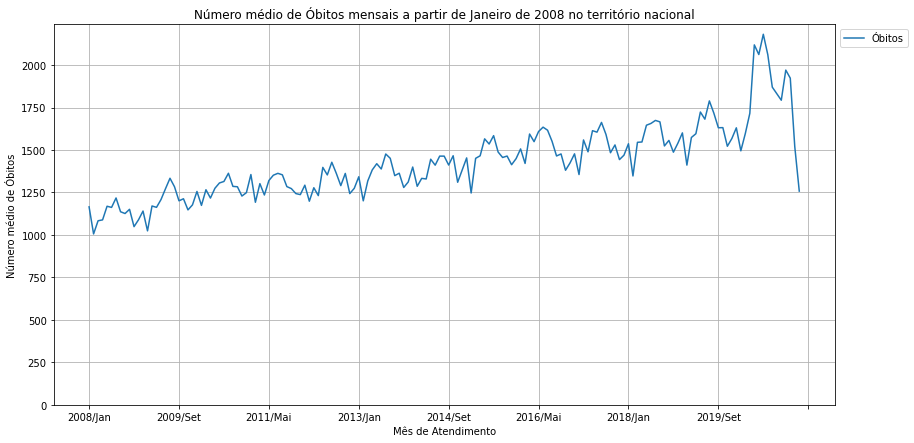

In [6]:
ax = dados_obitos.drop('Região', axis = 1).mean().plot(figsize = (14, 7))
ax.grid()
ax.set_title('Número médio de Óbitos mensais a partir de Janeiro de 2008 no território nacional')
ax.set_ylim(0,)
ax.set_xlabel('Mês de Atendimento')
ax.set_ylabel('Número médio de Óbitos')
ax.legend(['Óbitos'], bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

Analisando as informações disponiveis no gráfico acima, podemos verificar uma ligeira elevação do número médio de óbitos por mês, porém, não podemos logo de cara definir como apenas uma elevação bruta, pois esse número pode estar relacionado ao número de internações estar se elevando assim como o número de habitantes. Para o estudo, iremos avaliar mais adiante em relação ao número de internações. 

É possível verificar, também, uma certa sazonalidade da redução do número médio de óbitos, ocorrendo em intervalos não fixos porém seguidos por uma ligeira elevação, entretanto, no começo de 2020, pode ser observada uma elevação brusca no número médio de óbitos, podendo estar relacionada com o COVID-19.

O próximo gráfico corresponde também a média de óbitos mensais em território nacional, entretanto agrupados por regiões do país.

Junto ao gráfico foi desenhada uma linha vertical para avaliação do pico de casos de óbitos no início de 2020.

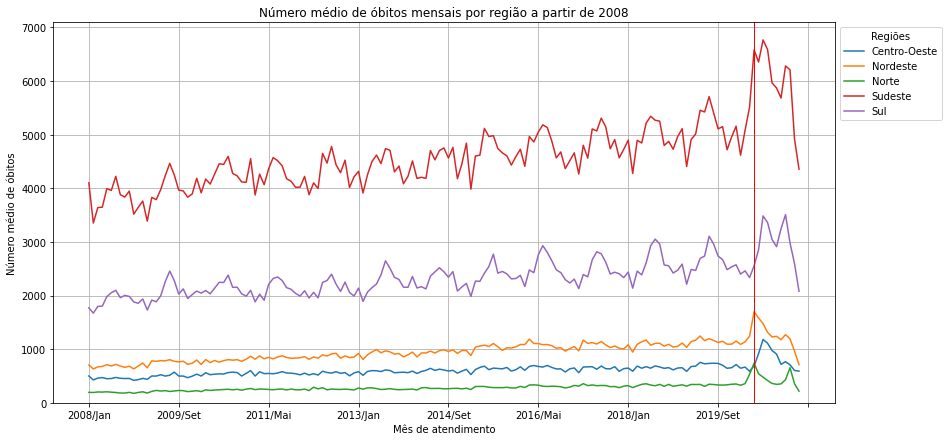

In [7]:
ax = dados_obitos.groupby('Região').mean().T.plot(figsize = (14, 7))
ax.grid()
ax.set_title('Número médio de óbitos mensais por região a partir de 2008')
ax.set_ylim(0,)
ax.set_xlabel('Mês de atendimento')
ax.set_ylabel('Número médio de óbitos')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left', title = 'Regiões')

plt.axvline(148, linewidth = 1, color = 'red')

plt.show()

Através do gráfico acima, com o valor médio de óbitos para cada uma das 5 regiões do Brasil, podemos observar algumas questões a respeito da evolução do número médio de óbitos como por exemplo, o destaque da região Sudeste em relação as outras 4 regiões, entretanto, assim como na análise anterior, por poder estar relacionado com o número de habitantes e o número de internações, entretanto, para as demais regiões, a regra não se aplica, devido o segundo lugar de destaque estar ocupado pela região Sul ao invés da região Nordeste. Um fator que poderia justificar a situação da inversão entre os estados Sul e Nordeste em relação aos óbitos, se comparados ao número de habitantes de cada região, pode ser o acesso ao SUS, sendo o número de óbitos inferior no Nordeste, mesmo com uma população superior ao Sul, caso a região apresente maiores dificuldades para acessar o sistema.

Fonte: Brasil Escola (https://brasilescola.uol.com.br/brasil/a-populacao-brasileira.htm)

Outra análise possível através do gráfico e da linha vertical desenhada é a proximidade dos picos iniciais em cada região, sendo coincidente nas regiões Sudeste, Nordeste e Norte, porém deslocada nas regiões Sul e Centro-Oeste.

É possível verificar também que a sazonalidade observada anteriormente, com quedas seguidas por picos de óbitos, ocorre de forma similar em todas as regiões.

Por fim, a última análise feita no primeiro bloco, diz respeito ao número de óbitos para os estados da Região Sudeste a partir de 2008.

Como os dados para cada mês de cada estado vem inteiro, não foi utilizada estratégia estatística de tratamento, como média ou soma.

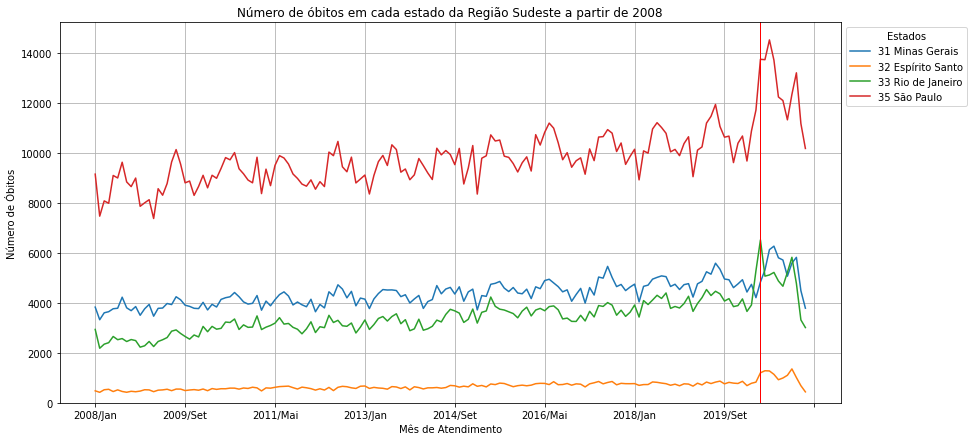

In [8]:
ax = dados_obitos.query('Região == "Sudeste"').drop('Região', axis = 1).T.plot(figsize = (14, 7))
ax.grid()
ax.set_title('Número de óbitos em cada estado da Região Sudeste a partir de 2008')
ax.set_ylim(0,)
ax.set_xlabel('Mês de Atendimento')
ax.set_ylabel('Número de Óbitos')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left', title = 'Estados')

plt.axvline(148, linewidth = 1, color = 'red')

plt.show()

Na análise final, podemos verificar um comportamento semelhante e esperado, o estado mais populoso, São Paulo, possui o número de óbitos mais elevado, enquanto o estado menos populoso, Espírito Santo, apresenta o menor número de óbitos, dessa forma, também não podemos simplesmente avaliar o estado Sudeste como estando em uma situação pior pois, o maior número de habitantes pode refletir em um maior número absoluto de óbitos, porém não necessariamente um valor por habitantes maior. Da mesma forma, os estados de Minas Gerais e do Rio de Janeiro possuem populações semelhantes e, portanto, faz sentido com o gráfico a proximidade dos valores.

Fonte: IBGE.

Também podemos analisar, similar ao gráfico anterior, o crescimento de casos de óbitos em uma data semelhante para todos os estados, podendo ser indicação do efeito da COVID-19.

Para o bloco de análise acima, percebe-se que, para o valor médio de óbitos, desde Janeiro de 2008 sofreu uma ligeira elevação, tanto na esfera nacional, nas regiões individuais e quando analisados os estados do Sudeste separadamente. Entretanto, a análise isolada do valor médio absoluto de óbitos não é capaz de indicar muito o móvito, pois desde 2008 a população em todo o Brasil cresceu, sendo assim, poderíamos ter uma relação de óbito por habitante tendo um comportamento diferente. Adicionalmente, é difícil comprar e quantidade de óbitos por região quando cada estado apresenta um número de habitantes diferentes, sendo assim, esperado que o valor de óbitos em um estado com mais habitantes seja mais elevado. Por fim, foi observado um pico de óbitos no começo de 2020, podendo ser um efeito da pandemia do COVID-19, uma vez que o efeito pode ser identificado em todas as regiões, em um período relativamente igual.

Para tanto, o próximo bloco de análise procura transformar os dados de óbito de uma forma a permitir a comparação entre os estados e o tempo.

## Obitos por número de internações

Para complementar o estudo, optou-se pela criação de um novo banco de dados, relacionando as informações obtidas pelo TabNet de número de óbitos e o de número de internações, que ainda não tinha sido utilizado. 

In [9]:
dados_obitos_por_internacoes = dados_obitos.drop('Região', axis = 1) / (dados_internacoes.drop('Região', axis = 1)/100)
dados_obitos_por_internacoes['Região'] = [regioes[dado[0]] for dado in dados_obitos_por_internacoes.index]
dados_obitos_por_internacoes.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.278138,1.168644,2.017630,1.855072,1.787102,1.737990,1.129944,0.968358,1.120000,1.259592,1.179280,1.517735,1.741716,1.401127,1.511501,1.497326,1.451862,1.340918,1.293760,1.433648,1.733383,1.466964,1.448755,1.268094,1.395617,1.573317,1.903497,1.847737,2.110879,2.289785,2.304369,2.216291,2.320600,2.248839,2.254914,2.345523,2.160849,1.913937,2.117133,2.467180,...,3.416880,2.969108,2.845451,3.000097,2.593237,2.636554,2.890346,3.046716,2.494654,2.664864,3.133056,3.106370,3.207028,2.620042,2.657964,3.245248,2.825509,2.681341,3.068410,2.675518,2.651030,2.479020,2.460203,2.606227,3.181864,2.714075,3.145809,3.884852,5.071294,5.813040,4.608405,4.780741,3.998090,3.219201,3.677383,4.807462,5.816369,5.754342,12.820513,Norte
12 Acre,2.864793,3.088907,2.642325,2.439024,2.303735,2.143814,2.253245,0.993984,1.721664,2.125091,1.960285,2.857143,2.689366,1.745108,2.190750,1.941975,1.870785,1.754386,2.218115,2.576809,4.870624,2.150284,2.477152,1.912568,2.330193,2.566225,2.655838,2.284827,2.469136,3.406510,3.082365,3.071672,2.983638,2.837040,2.303589,2.836704,2.986367,3.245338,2.820905,2.877532,...,3.330810,2.753335,2.976791,3.117207,3.191489,4.032258,3.911178,3.749383,3.567653,3.435211,2.983638,3.538360,3.590767,3.795066,3.620743,3.872945,3.271833,3.060712,2.926587,3.693182,3.173004,3.477626,3.835616,3.948832,3.750000,4.113924,3.453947,5.549664,6.742370,6.767910,5.635390,4.196978,3.517723,3.070727,3.834116,4.501439,3.734671,4.175293,3.691275,Norte
13 Amazonas,1.907837,2.212901,1.829309,2.059624,2.039721,1.961860,1.640332,1.616596,1.536041,1.872719,1.680811,1.626556,1.716329,2.021364,1.950903,2.273471,2.211400,2.423745,2.127186,2.039627,2.090751,2.219756,1.731329,1.824847,1.764880,1.830498,1.915709,2.281703,2.000738,2.061074,2.115560,2.022803,2.068966,1.926495,2.293370,2.592426,2.260695,2.416963,2.205834,2.390881,...,2.940602,2.929573,3.040041,3.271087,3.345383,3.329865,3.065864,3.112406,3.106317,3.478693,3.056050,3.218797,3.151470,3.610738,3.519010,3.025118,2.862630,3.160257,3.131685,3.315881,3.293340,3.200941,3.229219,3.421291,3.638773,3.453182,3.949684,12.413512,10.058770,5.379043,4.670169,4.354192,4.406435,4.374525,4.920902,6.161722,15.026921,7.655192,5.258951,Norte
14 Roraima,1.422550,1.035078,1.367855,1.221167,1.076605,1.525054,1.795332,1.697128,1.937618,1.587302,1.555137,2.215509,1.708633,1.633987,1.029703,2.304965,2.150084,1.771404,1.587302,2.222222,2.501955,2.385766,2.329383,2.012522,2.180685,2.283707,2.369165,1.930502,1.943700,1.915456,2.269044,2.000645,2.428571,3.235515,2.571203,2.225021,2.597403,2.620968,3.129514,2.929062,...,3.194103,2.560148,2.415876,2.985948,2.683123,3.592971,2.995684,2.964427,3.198741,3.201905,3.222836,2.799757,3.327645,3.214178,2.685533,2.667767,3.716960,3.250642,3.875574,3.330069,3.134479,2.572041,3.159236,3.154041,3.377111,2.560534,3.244496,3.482972,8.356449,10.289173,5.162338,2.941176,2.998183,2.967098,4.094828,4.139369,7.896305,10.332750,7.428041,Norte
15 Pará,1.469749,1.449347,1.481259,1.394912,1.414443,1.493948,1.489240,1.524998,1.430891,1.517670,1.511392,1.708548,1.675899,1.455111,1.512170,1.754155,1.603408,1.732446,1.547209,1.589269,1.632438,1.673527,1.580795,1.888937,1.753343,1.584449,

Devido o número de internações ser muito superior ao número de óbitos, para o banco de dados não ficar composto por números muito pequenas, foi utilizada a relação do número de óbitos para cada 100 casos de internações.

Abaixo, então, segue os gráficos para análise similares aos realizados anteriormente, porém agora com os novos dados.

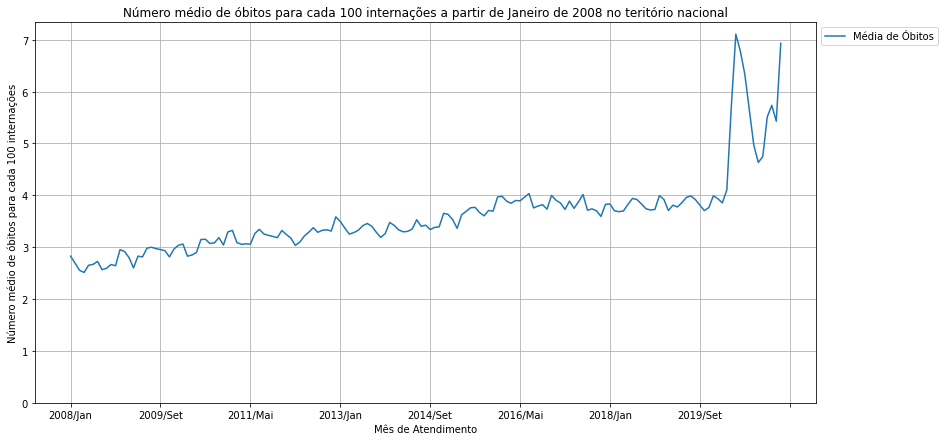

In [10]:
ax = dados_obitos_por_internacoes.drop('Região', axis = 1).mean().plot(figsize = (14, 7))
ax.grid()
ax.set_title('Número médio de óbitos para cada 100 internações a partir de Janeiro de 2008 no teritório nacional')
ax.set_ylim(0,)
ax.set_xlabel('Mês de Atendimento')
ax.set_ylabel('Número médio de óbitos para cada 100 internações')
ax.legend(['Média de Óbitos'], bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

Observando o gráfico acima, podemos verificar que, mesmo relacionando o número de óbitos com o número de internações, realmente observamos um aumento no número de óbitos registrados no SUS desde Janeiro de 2008, porém que vinha apresentando certa estabilidade desde início de 2016. Entretanto, assim como anteriormente, próximo ao começo de 2020 podemos identificar um aumento significativo, provavelmente relacionado ao cenário pandêmico iniciado na época.

A seguir, análogo à análise anterior, tem-se um gráfico agrupado por regiões.

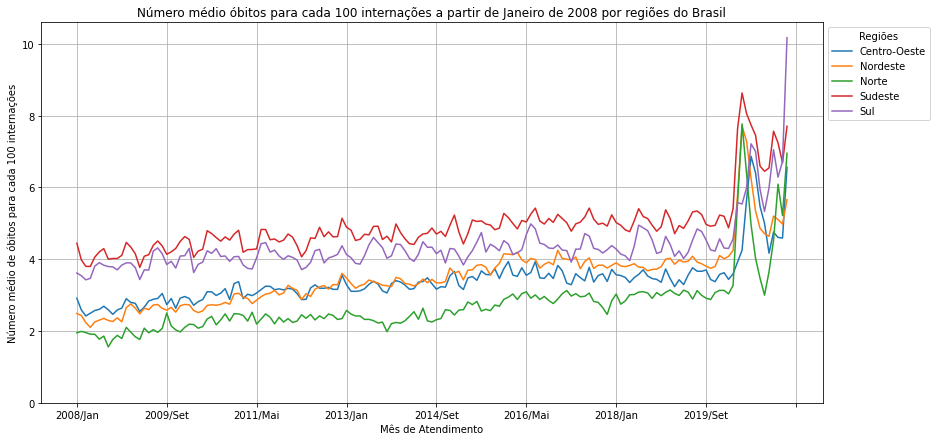

In [11]:
ax = dados_obitos_por_internacoes.groupby('Região').mean().T.plot(figsize = (14, 7))
ax.grid()
ax.set_title('Número médio óbitos para cada 100 internações a partir de Janeiro de 2008 por regiões do Brasil')
ax.set_ylim(0,)
ax.set_xlabel('Mês de Atendimento')
ax.set_ylabel('Número médio de óbitos para cada 100 internações')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left', title = 'Regiões')

plt.show()

Para o gráfico acima, a primeira diferença que pode ser notada é que as regiões não apresentam valores tão discrepantes, sendo assim, mesmo a região Sudeste sendo a mais populosa, podemos ver que a curva correspondente à região Sul não se encontra distante da curva da região Sudeste.

Entretanto, a análise referente à região Nordeste, segunda região mais populosa, porém se encontrando mais abaixo no gráfico não apenas se manteve como teve a diferença mais intensificada, ficando até mesmo atrás da região Centro-Oeste durante certo período e, a partir de Setembro de 2014 começou a ter valores superiores e ficando em terceiro, podendo indicar ser uma região que apresenta realmente um número de óbitos pelo número de internações inferior aos estados Sudeste e Sul ou, como sugerido anteriormente, podendo indicar uma dificuldade de acesso ao sistema, porém através dos dados analisados neste estudo, não temos como afirmar.

Também pode ser verificado o mesmo movimento do gráfico do território nacional com um crescimento da quantidade de óbitos por internações, entretanto, próximo ao mês de Maio de 2016 para frente, parece ocorrer uma ligeira estabilidade antes do início de 2020.


Por fim, para concluir as análises, temos o gráfico específico para região Sudeste.

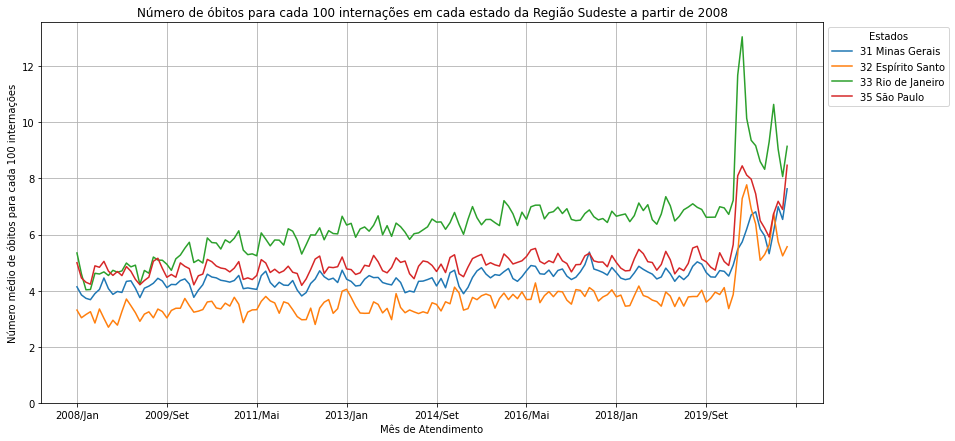

In [12]:
ax = dados_obitos_por_internacoes.query('Região == "Sudeste"').drop('Região', axis = 1).T.plot(figsize = (14, 7))
ax.grid()
ax.set_title('Número de óbitos para cada 100 internações em cada estado da Região Sudeste a partir de 2008')
ax.set_ylim(0,)
ax.set_xlabel('Mês de Atendimento')
ax.set_ylabel('Número médio de óbitos para cada 100 internações')
ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left', title = 'Estados')

plt.show()

Por fim, acima está a análise da Região Sudeste e seus 4 Estados. Assim como o gráfico anterior, apesar da diferença populacional, com a relação entre óbito e internações podemos ver diferenças bem menores em relação aos estados. Dessa forma, podemos ver uma inversão relacionada com o Estado do Rio de Janeiro, que apesar de apresentar a terceira população da região, possui o maior número de óbitos por internação da região, além de apresentar um número crescente de óbitos com os anos até 2016. É possível também identificar que o Estado possui o maior pico em relação ao início de 2020, indicando uma intensidade maior do impacto causado.

Também é possível verificar que o Estado de São Paulo, apesar de estar em destaque no gráfico de óbitos totais, nesse gráfico apresenta uma relativa estabilidade no seu valor, indicando que o crescimento de óbitos foi acompanhado de um crescimento de internações.

Os Estados de Minas Gerais e Espírito Santo apresentaram elevações discretas do número de óbitos por internações.

## Conclusões

Como conclusão do estudo, temos que a relação entre os parâmetros selecionados, de número de óbitos e número de internações, permitiu uma comparação entre regiões e estados com tamanho populacional diferente, diminuindo a diferença entre as regiões Sudeste e Norte, assim como dos Estados de São Paulo e Espírito Santo. Entretanto, utilizando ambos os parâmetros não foi possível identificar algum movimento interessante como uma redução do número de óbitos por internações, sendo possível apenas identificar uma ligeira estabilidade geral a partir de 2016.
Mesmo assim, foi possível identificar em todo o estudo picos próximos ao início de 2020, seja do valor absoluto de óbitos quanto o valor de óbitos por internações.
Apesar de identificar certa sazonalidade dos dados, apresentando períodos com redução de óbitos, não foi identificado nenhum padrão entre as reduções.
Como consideração final, seria interessante a utilização de mais parâmetros, tentando identificar alguma relação com o número de óbitos, podendo ser o valor gasto ou a população, procurando entender melhor se esse parâmetro está relacionado com algum outro. Ainda com os parâmetros selecionados, seria interessante uma análise da relação entre os parâmetros, procurando identificar se eles estão diretamente ou inversamente relacionados, podendo indicar o aumento de um com a queda de outro.
Ainda seria possível, seguindo as mesmas diretrizes do estudo, analisar outras Regiões e outros Estados, procurando outros movimentos.